In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from tqdm.notebook import tqdm
from sklearn.inspection import permutation_importance

from cm import plot_confusion_matrix

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [3]:
faults = pd.read_csv('../data/faults_15_15.csv')

In [4]:
faults = faults.drop('SwitchedBatteryVoltage', axis=1)

In [3]:
parse_dates = ['EventTimeStamp','NextDerateTimestamp']

In [58]:
faults_2_2 = pd.read_csv('../data/faults_2_2.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
faults_2_2 = faults_2_2.drop('SwitchedBatteryVoltage', axis=1)

In [60]:
faults_2_2

,EquipmentID,EventTimeStamp,InFailureWindow,NextDerateTimestamp,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3222,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97
0,1327,2015-05-19 12:02:55,0,NaN,14.3550,520309.6,185.0,0.0,31.90,203.8438,1083.125,10374.80,79274.466482,0.000000,109.4,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1327,2015-05-26 08:11:45,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1327,2015-05-26 08:44:10,0,NaN,14.3550,520314.6,161.6,45.0,38.86,154.5125,1170.000,10375.15,79275.391085,4.530565,100.4,6.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1327,2015-05-28 09:45:18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Fill NaN's using LinearRegression

In [61]:
faults_nans = faults

In [62]:
# First, fill NaN's with medians, which we use for LinearRegression and ultimately replace
faults_median = faults.fillna(faults.median()).iloc[:, 3:]
faults_median

,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97
0,14.3550,520309.6,185.0,0.0,31.90,203.8438,1083.125,10374.80,79274.466482,0.000000,109.4,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.2825,487982.8,181.4,42.0,33.06,207.6125,1263.250,10466.30,71820.852035,6.445818,104.0,9.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.3550,488578.2,186.8,17.0,32.48,199.2875,1112.500,10485.60,71903.273716,1.915253,93.2,4.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.3550,490252.3,188.6,55.0,19.72,208.3438,795.250,10538.80,72143.274025,4.094679,107.6,4.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [63]:
diagnostics = faults_median

In [64]:
linreg = LinearRegression()

In [65]:
diagnostics_list = list(diagnostics)[:12]

X = diagnostics.drop(columns = 'BarometricPressure')
y = diagnostics.BarometricPressure

linreg.fit(X, y)

prediction = pd.DataFrame(linreg.predict(X))
prediction.columns = ['BarometricPressure']

faults_nans.BarometricPressure.fillna(prediction.BarometricPressure, inplace=True)

In [240]:
for i in diagnostics_list:

    X = diagnostics.drop(columns = [i])
    y = diagnostics[i]

    linreg.fit(X, y)

    prediction = pd.DataFrame(linreg.predict(X))
    prediction.columns = [i]

    faults_nans[i].fillna(prediction[i], inplace=True)

In [241]:
faults_nans.iloc[:, :12].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192832 entries, 0 to 192831
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   EquipmentID               192832 non-null  int64  
 1   EventTimeStamp            192832 non-null  object 
 2   InFailureWindow           192832 non-null  int64  
 3   BarometricPressure        192832 non-null  float64
 4   DistanceLtd               192832 non-null  float64
 5   EngineCoolantTemperature  192832 non-null  float64
 6   EngineLoad                192832 non-null  float64
 7   EngineOilPressure         192832 non-null  float64
 8   EngineOilTemperature      192832 non-null  float64
 9   EngineRpm                 192832 non-null  float64
 10  EngineTimeLtd             192832 non-null  float64
 11  FuelLtd                   192832 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 17.7+ MB


In [242]:
faults_nans

,EquipmentID,EventTimeStamp,InFailureWindow,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97
0,1327,2015-05-19 12:02:55,0,14.3550,520309.6,185.0,0.0,31.90,203.8438,1083.125,10374.80,79274.466482,0.000000,109.4,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1330,2015-05-01 16:41:20,0,14.2825,487982.8,181.4,42.0,33.06,207.6125,1263.250,10466.30,71820.852035,6.445818,104.0,9.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1330,2015-05-05 23:46:19,0,14.3550,488578.2,186.8,17.0,32.48,199.2875,1112.500,10485.60,71903.273716,1.915253,93.2,4.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1330,2015-05-19 19:33:41,0,14.3550,490252.3,188.6,55.0,19.72,208.3438,795.250,10538.80,72143.274025,4.094679,107.6,4.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Fill NaN's using LinearRegression (2 x 2)

In [66]:
faults_2_2

,EquipmentID,EventTimeStamp,InFailureWindow,NextDerateTimestamp,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3222,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97
0,1327,2015-05-19 12:02:55,0,NaN,14.3550,520309.6,185.0,0.0,31.90,203.8438,1083.125,10374.80,79274.466482,0.000000,109.4,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1327,2015-05-26 08:11:45,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1327,2015-05-26 08:44:10,0,NaN,14.3550,520314.6,161.6,45.0,38.86,154.5125,1170.000,10375.15,79275.391085,4.530565,100.4,6.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1327,2015-05-28 09:45:18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [67]:
faults_nans_2_2 = faults_2_2

In [68]:
# First, fill NaN's with medians, which we use for LinearRegression and ultimately replace
faults_median_2_2 = faults_2_2.fillna(faults_2_2.median()).iloc[:, 4:]
faults_median_2_2

,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3222,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97
0,14.3550,520309.60,185.0,0.0,31.90,203.8438,1083.125,10374.80,79274.466482,0.000000,109.4,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.3550,369160.25,185.0,27.0,37.12,207.7813,1257.875,7383.65,52658.735985,3.130449,98.6,4.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.3550,520314.60,161.6,45.0,38.86,154.5125,1170.000,10375.15,79275.391085,4.530565,100.4,6.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.3550,369160.25,185.0,27.0,37.12,207.7813,1257.875,7383.65,52658.735985,3.130449,98.6,4.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [69]:
# Create a duplicate df - "diagnostics" will be used to operate the LinearRegression on, 
# while "Faults_median" will ultimately receive the values of the LinearRegression
diagnostics_2_2 = faults_median_2_2

In [70]:
# diagnostics_2_2.skew().sort_values().head(50)
# All columns are skewed

In [71]:
# ONLY RUN THIS CELL ONCE

# Create list for loop:
diagnostics_list_2_2 = list(diagnostics_2_2)[:12]

# Run a loop to fill NaNs in columns with the result of a LinearRegression based on the values you do have.
for i in tqdm(diagnostics_list_2_2):

    # Create X and y, with the target being each column in the list
    X = diagnostics_2_2.drop(columns = [i])
    y = diagnostics_2_2[i]
    
    # Inititate LinearDigression()
    ct = ColumnTransformer(transformers = [
        ('yeo-johnson', PowerTransformer(), list(diagnostics_2_2.drop(columns=[i]).columns))])

    linreg = Pipeline(steps = [
        ('transform', ct),
        ('scaler', StandardScaler()),
        ('linear', LinearRegression())
    ])
    
    #ttr = TransformedTargetRegressor(regressor = linreg, func = np.log, inverse_func = np.exp)

    # Fit the model
    linreg.fit(X, y) #ttr was resulting in an error

    # Create predictions for each column, based on the values in the "diagnostics" df. 
    # Assign to a temporary df, which we will use to fill NaNs
    prediction = pd.DataFrame(linreg.predict(X))
    prediction.columns = [i]

    # In the "faults_nans" df, replace all NaNs with corresponding values from the prediction df,
    # created by the LinearRegression
    faults_nans_2_2[i].fillna(prediction[i], inplace=True)

In [73]:
faults_nans_2_2 = faults_nans_2_2.merge(faults_2_2['EquipmentID'], left_index=True, right_index=True)

In [74]:
faults_nans_2_2.to_csv('../data/faults_nans_2_2.csv')

In [75]:
faults_nans_2_2

,EquipmentID_x,EventTimeStamp,InFailureWindow,NextDerateTimestamp,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3222,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97,EquipmentID_y
0,1327,2015-05-19 12:02:55,0,NaN,14.355000,520309.600000,185.000000,0.000000,31.900000,203.843800,1083.125000,10374.800000,79274.466482,0.000000,109.400000,2.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327
1,1327,2015-05-26 08:11:45,0,NaN,14.258047,378513.398297,178.720556,34.763840,37.262627,205.249009,1202.013523,7451.719780,52070.339880,6.010514,100.836600,10.234041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327
2,1327,2015-05-26 08:44:10,0,NaN,14.355000,520314.600000,161.600000,45.000000,38.860000,154.512500,1170.000000,10375.150000,79275.391085,4.530565,100.400000,6.670000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327
3,1327,2015-05-28 09:45:18,0,NaN,14.260900,372259.022028,180.587005,33.628909,37.388595,199.483855,1189.001683,7521.301978,52542.410562,5.870193,99.426049,7.960

## Create train_test data (for original dataset)

In [20]:
#faults_nans_2_2 = pd.read_csv('../data/faults_nans_2_2.csv', parse_dates = parse_dates)

In [21]:
#faults_nans_2_2 = faults_nans_2_2.drop(columns = 'Unnamed: 0')

In [22]:
#faults_nans_2_2.head()

In [23]:
equip_ids = pd.DataFrame(faults_nans_2_2['EquipmentID_x'].unique(), columns=['EquipmentID_x'])
np.random.seed(217)
equip_ids['AssignGroup']=(np.random.randint(0,10000, equip_ids.shape[0]))/10000
equip_ids['ModelGroup'] = np.where(equip_ids['AssignGroup'] <=.65, 'Train', 'Test')
#equip_ids.head()
faults_nans_2_2 = faults_nans_2_2.merge(equip_ids, on=['EquipmentID_x'])

In [24]:
print(equip_ids.groupby(['ModelGroup'])['AssignGroup'].count())
print(faults_nans_2_2.groupby(['ModelGroup'])['InFailureWindow'].sum())
faults_nans_2_2.head()

ModelGroup
Test     296
Train    546
Name: AssignGroup, dtype: int64
ModelGroup
Test     686
Train    801
Name: InFailureWindow, dtype: int64


,EquipmentID_x,EventTimeStamp,InFailureWindow,NextDerateTimestamp,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3222,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97,EquipmentID_y,AssignGroup,ModelGroup
0,1327,2015-05-19 12:02:55,0,NaT,14.355000,520309.600000,185.000000,0.000000,31.900000,203.843800,1083.125000,10374.800000,79274.466482,0.000000,109.400000,2.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327,0.4754,Train
1,1327,2015-05-26 08:11:45,0,NaT,14.258047,378513.398297,178.720556,34.763840,37.262627,205.249009,1202.013523,7451.719780,52070.339880,6.010514,100.836600,10.234041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327,0.4754,Train
2,1327,2015-05-26 08:44:10,0,NaT,14.355000,520314.600000,161.600000,45.000000,38.860000,154.512500,1170.000000,10375.150000,79275.391085,4.530565,100.400000,6.670000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327,0.4754,Train
3,1327,2015-05-28 09:45:18,0,NaT,14.260900,372259.022028,180.587005,33.628909,37.388595,199.483855

In [25]:
use_cols = ['ModelGroup','InFailureWindow']
[use_cols.append(col) for col in faults_nans_2_2.columns if 'Summ_' in col]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [26]:
faults_nans_2_2_df = faults_nans_2_2[use_cols]
faults_nans_2_2_df.head()

,ModelGroup,InFailureWindow,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3222,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97
0,Train,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Train,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Train,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Train,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Train,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [27]:
X = faults_nans_2_2_df.drop(columns= 'InFailureWindow')
y = faults_nans_2_2_df[['ModelGroup','InFailureWindow']]

In [28]:
X_train = X[X['ModelGroup']=='Train'].drop(columns = 'ModelGroup')

In [29]:
X_test = X[X['ModelGroup']=='Test'].drop(columns = 'ModelGroup')

In [30]:
y_train = y[y['ModelGroup']=='Train'].drop(columns = 'ModelGroup')

In [31]:
y_test = y[y['ModelGroup']=='Test'].drop(columns = 'ModelGroup')

## Find list of spns with no derate appearances
#### This variable will be labeled "positive_faults"

In [68]:
derate_appearances = pd.DataFrame(faults[faults['InFailureWindow']==1].iloc[:, 15:].astype(bool).sum(axis=0).\
                                     sort_values()).reset_index()

In [69]:
no_derate_appearances = pd.DataFrame(faults[faults['InFailureWindow']==0].iloc[:, 15:].astype(bool).sum(axis=0).\
                                     sort_values()).reset_index()

In [70]:
derate_appearances['index']=='Summ_100'

0      False
1      False
2      False
3      False
4      False
       ...  
135    False
136    False
137    False
138    False
139    False
Name: index, Length: 140, dtype: bool

In [71]:
derate_proportion = pd.merge(derate_appearances, no_derate_appearances, on='index', )

In [72]:
derate_proportion.columns = ['spn', 'derate', 'no_derate']

In [73]:
derate_proportion['proportion'] = derate_proportion['derate'] / (derate_proportion['no_derate'] + derate_proportion['derate'])

In [74]:
derate_proportion.sort_values('proportion', ascending=True)

,spn,derate,no_derate,proportion
0,Summ_411,0,1299,0.000000
33,Summ_101,0,2206,0.000000
34,Summ_95,0,339,0.000000
36,Summ_7854,0,246,0.000000
37,Summ_1072,0,38,0.000000
...,...,...,...,...
102,Summ_444,38,91,0.294574
124,Summ_5024,129,196,0.396923
120,Summ_6802,90,135,0.400000
27,Summ_4346,0,0,NaN


In [75]:
no_derate_spns = derate_proportion[derate_proportion['proportion']==0]['spn'].to_list()

In [76]:
positive_faults = faults.drop(no_derate_spns, axis=1)

## Basic Logistic Regression

In [9]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
logistic_model.predict_proba(X_test)

array([[0.97955108, 0.02044892],
       [0.98522587, 0.01477413],
       [0.98752434, 0.01247566],
       ...,
       [0.98933734, 0.01066266],
       [0.94596968, 0.05403032],
       [0.94402966, 0.05597034]])

In [11]:
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]
y_pred = logistic_model.predict(X_test)

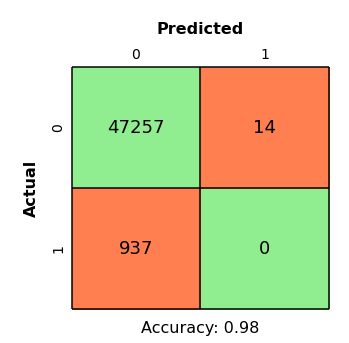

In [13]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [14]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.9802729837371391


In [18]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     47271
           1       0.00      0.00      0.00       937

    accuracy                           0.98     48208
   macro avg       0.49      0.50      0.50     48208
weighted avg       0.96      0.98      0.97     48208



## Add StandardScaler

In [20]:
lasso_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga', 
        max_iter = 5000))])

In [21]:
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [27]:
lasso_pipe.predict_proba(X_test)

array([[0.98276814, 0.01723186],
       [0.99608585, 0.00391415],
       [0.94770178, 0.05229822],
       ...,
       [0.99529251, 0.00470749],
       [0.99666769, 0.00333231],
       [0.99425173, 0.00574827]])

In [28]:
y_pred_prob = lasso_pipe.predict_proba(X_test)[:,1]
y_pred = lasso_pipe.predict(X_test)

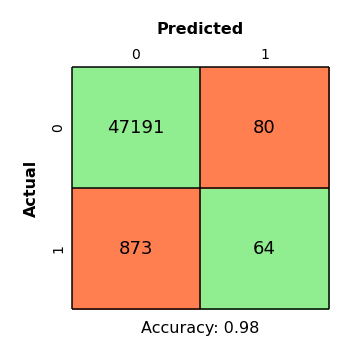

In [29]:
plot_confusion_matrix(y_test, lasso_pipe.predict(X_test), labels = ['0', '1'], metric='accuracy')

In [30]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.9802314968469964
sensitivity:
0.06830309498399147
precision:
0.4444444444444444
F1 Score:
0.11840888066604996


In [31]:
print(metrics.classification_report(y_test, lasso_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     47271
           1       0.44      0.07      0.12       937

    accuracy                           0.98     48208
   macro avg       0.71      0.53      0.55     48208
weighted avg       0.97      0.98      0.97     48208



## Add Balanced Class Weight

In [33]:
lasso_balanced = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga',
        class_weight='balanced',
        max_iter = 5000))])

In [34]:
lasso_balanced.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, class_weight='balanced',
                                    max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [35]:
lasso_balanced.predict_proba(X_test)

array([[0.71834378, 0.28165622],
       [0.93120456, 0.06879544],
       [0.16322238, 0.83677762],
       ...,
       [0.92446176, 0.07553824],
       [0.91567327, 0.08432673],
       [0.83451315, 0.16548685]])

In [36]:
y_pred_prob = lasso_balanced.predict_proba(X_test)[:,1]
y_pred = lasso_balanced.predict(X_test)

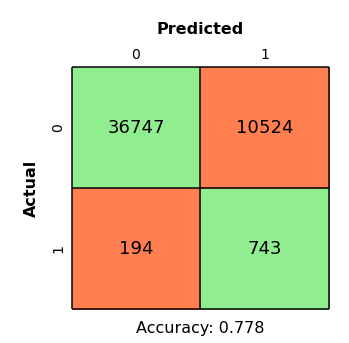

In [37]:
plot_confusion_matrix(y_test, lasso_balanced.predict(X_test), labels = ['0', '1'], metric='accuracy')

In [38]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.7776717557251909
sensitivity:
0.7929562433297759
precision:
0.06594479453270613
F1 Score:
0.12176335627663061


In [39]:
print(metrics.classification_report(y_test, lasso_balanced.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87     47271
           1       0.07      0.79      0.12       937

    accuracy                           0.78     48208
   macro avg       0.53      0.79      0.50     48208
weighted avg       0.98      0.78      0.86     48208



## Gridsearch of Random Weight Class
#### Stopped gridsearch after 12 hours.

f1 = make_scorer(f1_score, pos_label = 1)

param_grid = {'logistic__class_weight': [{0:1, 1:1}, 
                              {0:1, 1:5},
                              {0:1, 1:25},
                              {0:1, 1:50}]}

lasso_balanced = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga',
        #class_weight='balanced',
        max_iter = 5000))])

gs = GridSearchCV(estimator = lasso_balanced, 
                  param_grid = param_grid,
                  scoring = f1,
                  cv = 5)

gs.fit(X_train, y_train)

## Oversampling
### (with balanced weight classes removed)

In [9]:
oversampler = RandomOverSampler(random_state = 21)

In [10]:
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [11]:
y_resampled.value_counts()

1    141813
0    141813
Name: InFailureWindow, dtype: int64

In [12]:
oversample_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga', 
        max_iter = 5000))])

In [13]:
oversample_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [14]:
y_pred = oversample_pipe.predict(X_test)

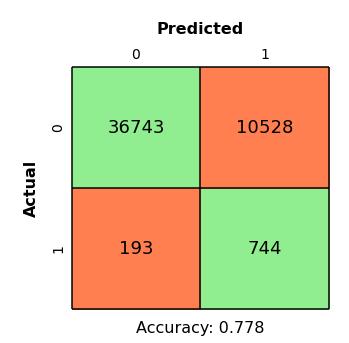

In [15]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [16]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.7776095253899767
sensitivity:
0.7940234791889007
precision:
0.0660042583392477
F1 Score:
0.1218773036284708


In [17]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87     47271
           1       0.07      0.79      0.12       937

    accuracy                           0.78     48208
   macro avg       0.53      0.79      0.50     48208
weighted avg       0.98      0.78      0.86     48208



## SMOTE

In [18]:
oversampler = SMOTE(k_neighbors=5, n_jobs=-1, random_state=21)

In [19]:
X_smote, y_smote = oversampler.fit_resample(X_train, y_train)

In [20]:
y_smote.value_counts()

1    141813
0    141813
Name: InFailureWindow, dtype: int64

In [21]:
SMOTE_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga', 
        max_iter = 5000))])

In [22]:
SMOTE_pipe.fit(X_smote, y_smote)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [23]:
y_pred = SMOTE_pipe.predict(X_test)

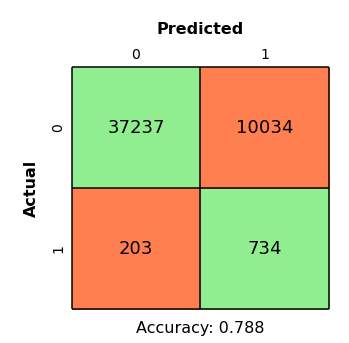

In [24]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [25]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.7876493528045138
sensitivity:
0.7833511205976521
precision:
0.06816493313521545
F1 Score:
0.12541648868005126


In [26]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     47271
           1       0.07      0.78      0.13       937

    accuracy                           0.79     48208
   macro avg       0.53      0.79      0.50     48208
weighted avg       0.98      0.79      0.86     48208



## Combination Over/Under Sampling

In [12]:
undersampler = RandomUnderSampler(random_state=21, sampling_strategy = 1/5)

In [13]:
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [15]:
y.value_counts()

0    189084
1      3748
Name: InFailureWindow, dtype: int64

In [14]:
y_resampled.value_counts()

0    28110
1     2811
Name: InFailureWindow, dtype: int64

In [12]:
oversampler = RandomOverSampler(random_state = 21)

In [13]:
X_resampled, y_resampled = oversampler.fit_resample(X_resampled, y_resampled)

In [14]:
y_resampled.value_counts()

1    14055
0    14055
Name: InFailureWindow, dtype: int64

In [15]:
overunder_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga', 
        max_iter = 5000))])

In [16]:
overunder_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [17]:
y_pred = overunder_pipe.predict(X_test)

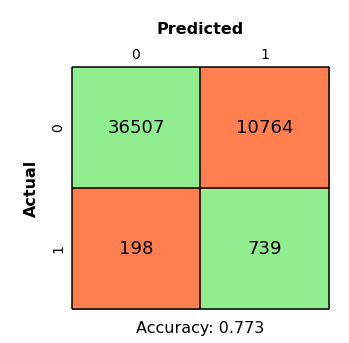

In [18]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [19]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.7726103551277796
sensitivity:
0.7886872998932765
precision:
0.06424411023211336
F1 Score:
0.11881028938906753


In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87     47271
           1       0.06      0.79      0.12       937

    accuracy                           0.77     48208
   macro avg       0.53      0.78      0.49     48208
weighted avg       0.98      0.77      0.85     48208



## Manual Search of Weight Classes

#### {0:1, 1:15}

In [16]:
undersampler = RandomUnderSampler(random_state=21, sampling_strategy = 1/10)

In [17]:
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [18]:
#oversampler = RandomOverSampler(random_state = 21)

In [19]:
#X_resampled, y_resampled = oversampler.fit_resample(X_resampled, y_resampled)

In [20]:
weightcheck_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga', 
        class_weight = {0:1, 1:15},
        max_iter = 5000))])

In [21]:
weightcheck_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, class_weight={0: 1, 1: 15},
                                    max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [22]:
y_pred = weightcheck_pipe.predict(X_test)

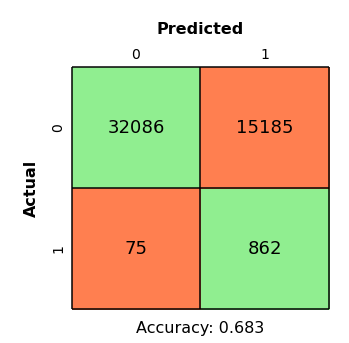

In [23]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [24]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.6834550282110853
sensitivity:
0.919957310565635
precision:
0.05371720570823207
F1 Score:
0.10150730098916629


In [25]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81     47271
           1       0.05      0.92      0.10       937

    accuracy                           0.68     48208
   macro avg       0.53      0.80      0.45     48208
weighted avg       0.98      0.68      0.79     48208



#### {0:1, 1:1}

In [26]:
undersampler = RandomUnderSampler(random_state=21, sampling_strategy = 1/10)

In [27]:
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [28]:
#oversampler = RandomOverSampler(random_state = 21)

In [29]:
#X_resampled, y_resampled = oversampler.fit_resample(X_resampled, y_resampled)

In [30]:
weightcheck_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga', 
        class_weight = {0:1, 1:1},
        max_iter = 5000))])

In [31]:
weightcheck_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, class_weight={0: 1, 1: 1},
                                    max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [32]:
y_pred = weightcheck_pipe.predict(X_test)

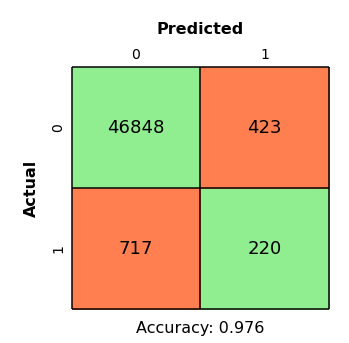

In [33]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [34]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.9763524726186525
sensitivity:
0.23479188900747064
precision:
0.3421461897356143
F1 Score:
0.27848101265822783


In [35]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     47271
           1       0.34      0.23      0.28       937

    accuracy                           0.98     48208
   macro avg       0.66      0.61      0.63     48208
weighted avg       0.97      0.98      0.97     48208



#### {0:1, 1:5}

In [36]:
undersampler = RandomUnderSampler(random_state=21, sampling_strategy = 1/10)

In [37]:
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [38]:
#oversampler = RandomOverSampler(random_state = 21)

In [39]:
#X_resampled, y_resampled = oversampler.fit_resample(X_resampled, y_resampled)

In [40]:
weightcheck_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga', 
        class_weight = {0:1, 1:5},
        max_iter = 5000))])

In [41]:
weightcheck_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, class_weight={0: 1, 1: 5},
                                    max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [42]:
y_pred = weightcheck_pipe.predict(X_test)

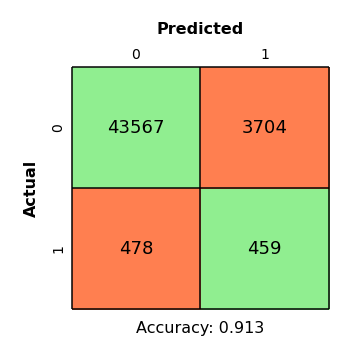

In [43]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [44]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.9132509127115831
sensitivity:
0.48986125933831376
precision:
0.11025702618304108
F1 Score:
0.18


In [45]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     47271
           1       0.11      0.49      0.18       937

    accuracy                           0.91     48208
   macro avg       0.55      0.71      0.57     48208
weighted avg       0.97      0.91      0.94     48208



#### {0:1, 1:25}

In [46]:
undersampler = RandomUnderSampler(random_state=21, sampling_strategy = 1/10)

In [47]:
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [48]:
#oversampler = RandomOverSampler(random_state = 21)

In [49]:
#X_resampled, y_resampled = oversampler.fit_resample(X_resampled, y_resampled)

In [50]:
weightcheck_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga', 
        class_weight = {0:1, 1:25},
        max_iter = 5000))])

In [51]:
weightcheck_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, class_weight={0: 1, 1: 25},
                                    max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [52]:
y_pred = weightcheck_pipe.predict(X_test)

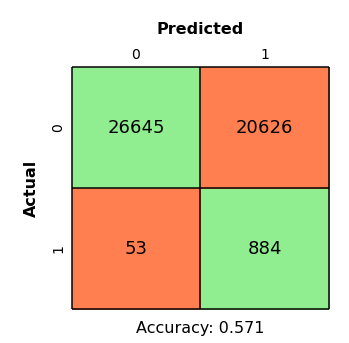

In [53]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [54]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.5710462993693993
sensitivity:
0.9434364994663821
precision:
0.04109716410971641
F1 Score:
0.07876330912816856


In [55]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72     47271
           1       0.04      0.94      0.08       937

    accuracy                           0.57     48208
   macro avg       0.52      0.75      0.40     48208
weighted avg       0.98      0.57      0.71     48208



#### {0:1, 1:50}

In [56]:
undersampler = RandomUnderSampler(random_state=21, sampling_strategy = 1/10)

In [57]:
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [58]:
#oversampler = RandomOverSampler(random_state = 21)

In [59]:
#X_resampled, y_resampled = oversampler.fit_resample(X_resampled, y_resampled)

In [60]:
weightcheck_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga', 
        class_weight = {0:1, 1:50},
        max_iter = 5000))])

In [61]:
weightcheck_pipe.fit(X_resampled, y_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, class_weight={0: 1, 1: 50},
                                    max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [62]:
y_pred = weightcheck_pipe.predict(X_test)

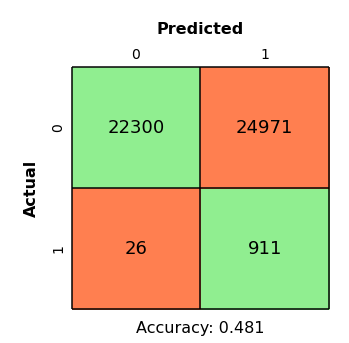

In [63]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [64]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.4814761035512778
sensitivity:
0.9722518676627535
precision:
0.035198207248280655
F1 Score:
0.06793691039934374


In [65]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64     47271
           1       0.04      0.97      0.07       937

    accuracy                           0.48     48208
   macro avg       0.52      0.72      0.35     48208
weighted avg       0.98      0.48      0.63     48208



## Remove most diagnostic columns
## No Undersampling, use class weight of {0:1, 1:2}

In [12]:
faults.columns[:20]

Index(['EquipmentID', 'EventTimeStamp', 'InFailureWindow', 'BarometricPressure', 'DistanceLtd', 'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLtd', 'FuelRate', 'IntakeManifoldTemperature', 'TurboBoostPressure', 'Summ_100', 'Summ_101', 'Summ_102', 'Summ_103', 'Summ_105'], dtype='object')

In [16]:
faults_small = faults.drop(['EquipmentID', 'EventTimeStamp', 'BarometricPressure', 'EngineCoolantTemperature', 
                            'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 
                            'FuelLtd', 'FuelRate', 'IntakeManifoldTemperature', 'TurboBoostPressure'], axis=1)

In [17]:
faults_small

,InFailureWindow,DistanceLtd,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97
0,0,520309.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,487982.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,488578.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,490252.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,490367.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [18]:
faults_small = faults_small.fillna(faults_small.median())

In [19]:
# Predictors
X_small = faults_small.drop(columns = ['InFailureWindow'])
# Target
y_small = faults_small.InFailureWindow

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, random_state = 21, stratify = y)

In [21]:
small_lasso = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga',
        class_weight={0:1, 1:2},
        max_iter = 5000))])

In [22]:
small_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, class_weight={0: 1, 1: 2},
                                    max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [23]:
y_pred = small_lasso.predict(X_test)

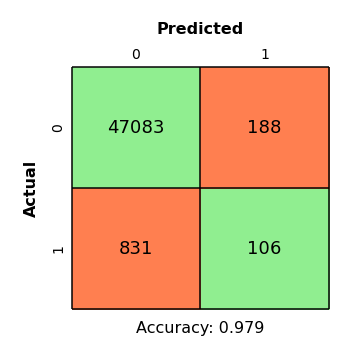

In [24]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [25]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.9788624294722867
sensitivity:
0.11312700106723586
precision:
0.36054421768707484
F1 Score:
0.1722177091795288


In [27]:
print(metrics.classification_report(y_test, small_lasso.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     47271
           1       0.36      0.11      0.17       937

    accuracy                           0.98     48208
   macro avg       0.67      0.55      0.58     48208
weighted avg       0.97      0.98      0.97     48208



## Use positive_faults (without SPNs with no derate)
### No Undersampling, use class weight of {0:1, 1:5}
#### Will want to use {0:1, 1:1}, but it takes too long

In [59]:
positive_faults.head()

,EquipmentID,EventTimeStamp,InFailureWindow,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_102,Summ_103,Summ_105,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1209,Summ_1569,Summ_157,Summ_175,Summ_1761,Summ_2623,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3482,Summ_3490,Summ_3513,Summ_3556,Summ_3610,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4363,Summ_4364,Summ_4376,Summ_444,Summ_4765,Summ_4794,Summ_4796,Summ_5024,Summ_5031,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_612,Summ_630,Summ_641,Summ_651,Summ_6802,Summ_723,Summ_81,Summ_862,Summ_91,Summ_96,Summ_97
0,1327,2015-05-19 12:02:55,0,14.3550,520309.6,185.0,0.0,31.90,203.8438,1083.125,10374.8,79274.466482,0.000000,109.4,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1330,2015-05-01 16:41:20,0,14.2825,487982.8,181.4,42.0,33.06,207.6125,1263.250,10466.3,71820.852035,6.445818,104.0,9.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1330,2015-05-05 23:46:19,0,14.3550,488578.2,186.8,17.0,32.48,199.2875,1112.500,10485.6,71903.273716,1.915253,93.2,4.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1330,2015-05-19 19:33:41,0,14.3550,490252.3,188.6,55.0,19.72,208.3438,795.250,10538.8,72143.274025,4.094679,107.6,4.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1330,2015-05-20 16:15:08,0,14.2825,490367.8,188.6,30.0,37.70,177.3500,1367.250,10543.0,72162.954843,4.438105,125.6,8.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# Predictors
X_positive = positive_faults.drop(columns = ['InFailureWindow', 'EquipmentID', 'EventTimeStamp'])
# Target
y_positive = positive_faults.InFailureWindow

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_positive, y_positive, random_state = 21, stratify = y)

In [53]:
positive_lasso = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga',
        class_weight={0:1, 1:5},
        max_iter = 5000))])

In [54]:
positive_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, class_weight={0: 1, 1: 5},
                                    max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [55]:
y_pred = positive_lasso.predict(X_test)

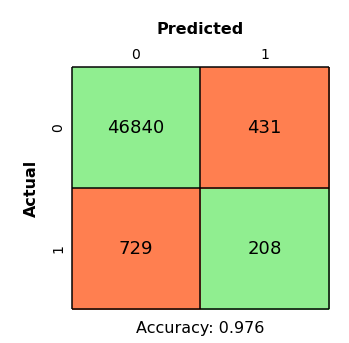

In [56]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [57]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.9759376037172254
sensitivity:
0.22198505869797225
precision:
0.325508607198748
F1 Score:
0.2639593908629442


In [58]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     47271
           1       0.33      0.22      0.26       937

    accuracy                           0.98     48208
   macro avg       0.66      0.61      0.63     48208
weighted avg       0.97      0.98      0.97     48208



# Use positive_faults (without SPNs with no derate)
### No Undersampling, use class weight of {0:1, 1:1}

In [77]:
positive_faults.head()

,EquipmentID,EventTimeStamp,InFailureWindow,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_102,Summ_103,Summ_105,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1209,Summ_1569,Summ_157,Summ_175,Summ_1761,Summ_2623,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3482,Summ_3490,Summ_3513,Summ_3556,Summ_3610,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4363,Summ_4364,Summ_4376,Summ_444,Summ_4765,Summ_4794,Summ_4796,Summ_5024,Summ_5031,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_612,Summ_630,Summ_641,Summ_651,Summ_6802,Summ_723,Summ_81,Summ_862,Summ_91,Summ_96,Summ_97
0,1327,2015-05-19 12:02:55,0,14.3550,520309.6,185.0,0.0,31.90,203.8438,1083.125,10374.8,79274.466482,0.000000,109.4,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1330,2015-05-01 16:41:20,0,14.2825,487982.8,181.4,42.0,33.06,207.6125,1263.250,10466.3,71820.852035,6.445818,104.0,9.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1330,2015-05-05 23:46:19,0,14.3550,488578.2,186.8,17.0,32.48,199.2875,1112.500,10485.6,71903.273716,1.915253,93.2,4.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1330,2015-05-19 19:33:41,0,14.3550,490252.3,188.6,55.0,19.72,208.3438,795.250,10538.8,72143.274025,4.094679,107.6,4.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1330,2015-05-20 16:15:08,0,14.2825,490367.8,188.6,30.0,37.70,177.3500,1367.250,10543.0,72162.954843,4.438105,125.6,8.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# Predictors
X_positive = positive_faults.drop(columns = ['InFailureWindow', 'EquipmentID', 'EventTimeStamp'])
# Target
y_positive = positive_faults.InFailureWindow

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_positive, y_positive, random_state = 21, stratify = y)

In [80]:
positive_lasso = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga',
        class_weight={0:1, 1:1},
        max_iter = 5000))])

In [81]:
positive_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, class_weight={0: 1, 1: 1},
                                    max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [82]:
y_pred = positive_lasso.predict(X_test)

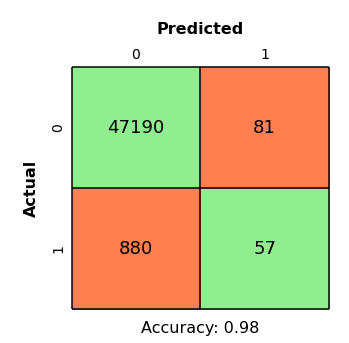

In [83]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [84]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.9800655492864255
sensitivity:
0.060832443970117396
precision:
0.41304347826086957
F1 Score:
0.10604651162790697


In [85]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     47271
           1       0.41      0.06      0.11       937

    accuracy                           0.98     48208
   macro avg       0.70      0.53      0.55     48208
weighted avg       0.97      0.98      0.97     48208



## Use positive_faults (without SPNs with no derate)
### No Undersampling, use class weight of {0:1, 1:2}, C=0.1

In [95]:
positive_faults.head()

,EquipmentID,EventTimeStamp,InFailureWindow,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_102,Summ_103,Summ_105,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1209,Summ_1569,Summ_157,Summ_175,Summ_1761,Summ_2623,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3482,Summ_3490,Summ_3513,Summ_3556,Summ_3610,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4363,Summ_4364,Summ_4376,Summ_444,Summ_4765,Summ_4794,Summ_4796,Summ_5024,Summ_5031,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_612,Summ_630,Summ_641,Summ_651,Summ_6802,Summ_723,Summ_81,Summ_862,Summ_91,Summ_96,Summ_97
0,1327,2015-05-19 12:02:55,0,14.3550,520309.6,185.0,0.0,31.90,203.8438,1083.125,10374.8,79274.466482,0.000000,109.4,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1330,2015-05-01 16:41:20,0,14.2825,487982.8,181.4,42.0,33.06,207.6125,1263.250,10466.3,71820.852035,6.445818,104.0,9.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1330,2015-05-05 23:46:19,0,14.3550,488578.2,186.8,17.0,32.48,199.2875,1112.500,10485.6,71903.273716,1.915253,93.2,4.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1330,2015-05-19 19:33:41,0,14.3550,490252.3,188.6,55.0,19.72,208.3438,795.250,10538.8,72143.274025,4.094679,107.6,4.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1330,2015-05-20 16:15:08,0,14.2825,490367.8,188.6,30.0,37.70,177.3500,1367.250,10543.0,72162.954843,4.438105,125.6,8.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# Predictors
X_positive = positive_faults.drop(columns = ['InFailureWindow', 'EquipmentID', 'EventTimeStamp'])
# Target
y_positive = positive_faults.InFailureWindow

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_positive, y_positive, random_state = 21, stratify = y)

In [98]:
positive_lasso = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l1', #Determines Lasso/Ridge
        C = 0.1,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga',
        class_weight={0:1, 1:2},
        max_iter = 5000))])

In [99]:
positive_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight={0: 1, 1: 2},
                                    max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [100]:
y_pred = positive_lasso.predict(X_test)

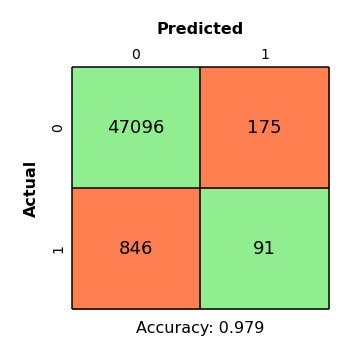

In [101]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [102]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.978820942582144
sensitivity:
0.09711846318036287
precision:
0.34210526315789475
F1 Score:
0.15128844555278473


In [103]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     47271
           1       0.34      0.10      0.15       937

    accuracy                           0.98     48208
   macro avg       0.66      0.55      0.57     48208
weighted avg       0.97      0.98      0.97     48208



## Ridge Regression, full dataset
### No Undersampling, use class weight of {0:1, 1:2}

In [119]:
faults.head()

,EquipmentID,EventTimeStamp,InFailureWindow,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97
0,1327,2015-05-19 12:02:55,0,14.3550,520309.6,185.0,0.0,31.90,203.8438,1083.125,10374.8,79274.466482,0.000000,109.4,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1330,2015-05-01 16:41:20,0,14.2825,487982.8,181.4,42.0,33.06,207.6125,1263.250,10466.3,71820.852035,6.445818,104.0,9.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1330,2015-05-05 23:46:19,0,14.3550,488578.2,186.8,17.0,32.48,199.2875,1112.500,10485.6,71903.273716,1.915253,93.2,4.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1330,2015-05-19 19:33:41,0,14.3550,490252.3,188.6,55.0,19.72,208.3438,795.250,10538.8,72143.274025,4.094679,107.6,4.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2

In [120]:
# Predictors
X = faults.drop(columns = ['InFailureWindow', 'EquipmentID', 'EventTimeStamp'])
# Target
y_positive = faults.InFailureWindow

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, stratify = y)

In [122]:
positive_lasso = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l2', #Determines Lasso/Ridge
        C = 0.01,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga',
        class_weight={0:1, 1:5},
        max_iter = 5000))])

In [123]:
positive_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight={0: 1, 1: 5},
                                    max_iter=5000, solver='saga'))])

In [124]:
y_pred = positive_lasso.predict(X_test)

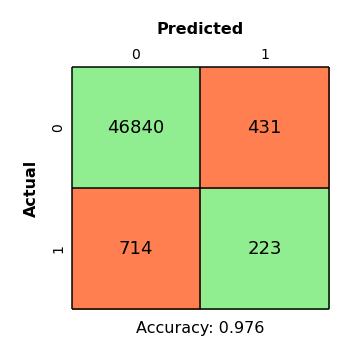

In [125]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [117]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.9756886823763691
sensitivity:
0.2102454642475987
precision:
0.31319554848966613
F1 Score:
0.2515964240102171


In [118]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     47271
           1       0.31      0.21      0.25       937

    accuracy                           0.98     48208
   macro avg       0.65      0.60      0.62     48208
weighted avg       0.97      0.98      0.97     48208



## Ridge Regression, Updated Dataset filled by LinearRegression
### No Undersampling, use class weight of {0:1, 1:5}

In [250]:
faults_nans.head()

,EquipmentID,EventTimeStamp,InFailureWindow,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97
0,1327,2015-05-19 12:02:55,0,14.3550,520309.6,185.0,0.0,31.90,203.8438,1083.125,10374.8,79274.466482,0.000000,109.4,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1330,2015-05-01 16:41:20,0,14.2825,487982.8,181.4,42.0,33.06,207.6125,1263.250,10466.3,71820.852035,6.445818,104.0,9.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1330,2015-05-05 23:46:19,0,14.3550,488578.2,186.8,17.0,32.48,199.2875,1112.500,10485.6,71903.273716,1.915253,93.2,4.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1330,2015-05-19 19:33:41,0,14.3550,490252.3,188.6,55.0,19.72,208.3438,795.250,10538.8,72143.274025,4.094679,107.6,4.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2

In [251]:
# Predictors
X_lr = faults_nans.drop(columns = ['InFailureWindow', 'EquipmentID', 'EventTimeStamp'])
# Target
y_lr = faults_nans.InFailureWindow

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, random_state = 21, stratify = y_lr)

In [254]:
ridge_with_linear_data = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l2', #Determines Lasso/Ridge
        C = 0.01,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga',
        class_weight={0:1, 1:5},
        max_iter = 5000))])

In [255]:
ridge_with_linear_data.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight={0: 1, 1: 5},
                                    max_iter=5000, solver='saga'))])

In [256]:
y_pred = ridge_with_linear_data.predict(X_test)

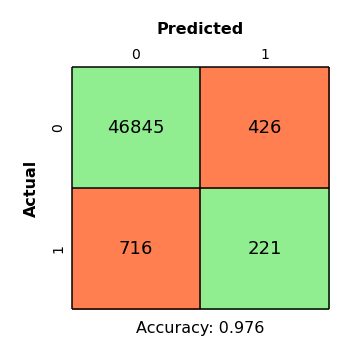

In [257]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [258]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.9763109857285098
sensitivity:
0.23585912486659552
precision:
0.3415765069551777
F1 Score:
0.27904040404040403


In [259]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     47271
           1       0.34      0.24      0.28       937

    accuracy                           0.98     48208
   macro avg       0.66      0.61      0.63     48208
weighted avg       0.97      0.98      0.97     48208



## Ridge Regression, 2_2 Dataset filled by LinearRegression
### No Undersampling, use class weight of {0:1, 1:5}

In [32]:
faults_nans_2_2.head()

,EquipmentID_x,EventTimeStamp,InFailureWindow,NextDerateTimestamp,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLtd,FuelRate,IntakeManifoldTemperature,TurboBoostPressure,Summ_100,Summ_101,Summ_102,Summ_103,Summ_105,Summ_1072,Summ_1075,Summ_108,Summ_110,Summ_111,Summ_1127,Summ_1172,Summ_1176,Summ_1209,Summ_1239,Summ_125,Summ_1322,Summ_1323,Summ_1325,Summ_1326,Summ_1328,Summ_1347,Summ_1569,Summ_157,Summ_168,Summ_171,Summ_175,Summ_1761,Summ_188,Summ_190,Summ_191,Summ_196608,Summ_237,Summ_2623,Summ_27,Summ_2791,Summ_3031,Summ_3058,Summ_3060,Summ_3216,Summ_3218,Summ_3222,Summ_3226,Summ_3228,Summ_3242,Summ_3246,Summ_3251,Summ_3360,Summ_3361,Summ_3362,Summ_3363,Summ_3364,Summ_3464,Summ_3480,Summ_3482,Summ_3490,Summ_3509,Summ_3510,Summ_3511,Summ_3512,Summ_3513,Summ_3515,Summ_3556,Summ_3597,Summ_3610,Summ_3703,Summ_3720,Summ_3936,Summ_4094,Summ_4096,Summ_411,Summ_412,Summ_4331,Summ_4334,Summ_4339,Summ_4340,Summ_4342,Summ_4344,Summ_4346,Summ_4360,Summ_4363,Summ_4364,Summ_4375,Summ_4376,Summ_444,Summ_4607,Summ_4765,Summ_4792,Summ_4794,Summ_4795,Summ_4796,Summ_5019,Summ_5024,Summ_5031,Summ_51,Summ_520953,Summ_524287,Summ_5298,Summ_5319,Summ_5394,Summ_5397,Summ_5491,Summ_558,Summ_5585,Summ_563,Summ_5742,Summ_5743,Summ_5746,Summ_5835,Summ_5848,Summ_5851,Summ_5853,Summ_5862,Summ_612,Summ_629,Summ_630,Summ_633,Summ_639,Summ_641,Summ_647,Summ_651,Summ_652,Summ_653,Summ_654,Summ_655,Summ_65535,Summ_656,Summ_6713,Summ_6773,Summ_6780,Summ_6802,Summ_723,Summ_7827,Summ_7854,Summ_81,Summ_84,Summ_862,Summ_91,Summ_95,Summ_96,Summ_97,EquipmentID_y,AssignGroup,ModelGroup
0,1327,2015-05-19 12:02:55,0,NaT,14.355000,520309.600000,185.000000,0.000000,31.900000,203.843800,1083.125000,10374.800000,79274.466482,0.000000,109.400000,2.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327,0.4754,Train
1,1327,2015-05-26 08:11:45,0,NaT,14.258047,378513.398297,178.720556,34.763840,37.262627,205.249009,1202.013523,7451.719780,52070.339880,6.010514,100.836600,10.234041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327,0.4754,Train
2,1327,2015-05-26 08:44:10,0,NaT,14.355000,520314.600000,161.600000,45.000000,38.860000,154.512500,1170.000000,10375.150000,79275.391085,4.530565,100.400000,6.670000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327,0.4754,Train
3,1327,2015-05-28 09:45:18,0,NaT,14.260900,372259.022028,180.587005,33.628909,37.388595,199.483855

In [33]:
ridge_2_2 = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(
        penalty = 'l2', #Determines Lasso/Ridge
        C = 0.05,  #The smaller the number, the stronger the effect of the penalty.
        solver = 'saga',
        class_weight={0:1, 1:5},
        max_iter = 5000))])

In [34]:
ridge_2_2.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05, class_weight={0: 1, 1: 5},
                                    max_iter=5000, solver='saga'))])

In [116]:
y_pred = ridge_2_2.predict(X_test)

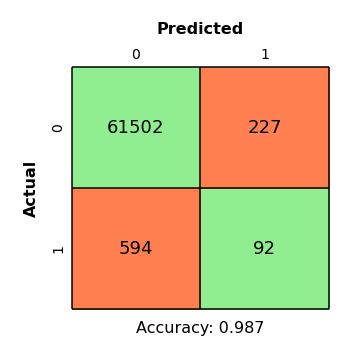

In [117]:
plot_confusion_matrix(y_test, y_pred, labels = ['0', '1'], metric='accuracy')

In [118]:
# Percent of all cases classified correctly
print('accuracy:')
print(metrics.accuracy_score(y_test, y_pred))

# Proportion of 1s classified correctly as 1s
print('sensitivity:')
print(metrics.recall_score(y_test, y_pred))

# Proportion of predicted 1s that are actually 1s
print('precision:')
print(metrics.precision_score(y_test, y_pred))

# Harmonic mean of precision and recall
print('F1 Score:')
print(metrics.f1_score(y_test, y_pred))

accuracy:
0.9868461107105664
sensitivity:
0.13411078717201166
precision:
0.2884012539184953
F1 Score:
0.18308457711442783


In [119]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61729
           1       0.29      0.13      0.18       686

    accuracy                           0.99     62415
   macro avg       0.64      0.57      0.59     62415
weighted avg       0.98      0.99      0.98     62415



## Find permutation importance

In [23]:
#ridge_2_2_result = ridge_2_2.fit(X_train, y_train)

In [24]:
#ridge_2_2_importance = permutation_importance(ridge_2_2_result, X_train, y_train, random_state=21)

In [120]:
#ridge_2_2_importance

## Compute Dollar Values

In [209]:
#faults_nans_2_2

In [218]:
# Merge the predictions with y_test
y_test_compare = pd.DataFrame(y_test.copy())
y_test_compare['predictions'] = y_pred
y_test_compare = y_test_compare.merge(faults_nans_2_2, left_index=True, right_index=True)
#y_test_compare[['InFailureWindow_x', 'predictions','EquipmentID','EventTimeStamp','NextDerateTimestamp','InFailureWindow_y']].to_csv('../data/y_test_compare.csv')

In [219]:
y_test_compare['NextDerateTimestamp'] = y_test_compare['NextDerateTimestamp'].fillna(
    datetime.strptime('Dec 31 2099  11:59PM', '%b %d %Y %I:%M%p'))

In [220]:
y_test_compare['EventDate'] = y_test_compare['EventTimeStamp'].dt.date

In [221]:
#Manually calc our confusion matrix numbers
y_test_compare['TrueNegative'] = np.where((y_test_compare['InFailureWindow_x']==0) & (y_test_compare['predictions']==0),1,0)
y_test_compare['FalseNegative'] = np.where((y_test_compare['InFailureWindow_x']==1) & (y_test_compare['predictions']==0),1,0)
y_test_compare['TruePositive'] = np.where((y_test_compare['InFailureWindow_x']==1) & (y_test_compare['predictions']==1),1,0)
y_test_compare['FalsePositive'] = np.where((y_test_compare['InFailureWindow_x']==0) & (y_test_compare['predictions']==1),1,0)

In [222]:
#Groupby of confusion matrix by Equipment ID and Event Date, finding counts
y_test_matrix = y_test_compare.groupby(['EquipmentID_x', 'EventDate'])[
    ['TrueNegative','FalseNegative','TruePositive','FalsePositive']].sum().reset_index()

In [223]:
TruePositive = y_test_matrix[y_test_matrix['TruePositive']!=0]['TruePositive'].count()
print('True Positive: ', TruePositive)
FalsePositive = y_test_matrix[y_test_matrix['FalsePositive']!=0]['FalsePositive'].count()
print('False Positive: ', FalsePositive)
FalseNegative = pd.DataFrame(np.where((y_test_matrix['FalseNegative']!=0) & 
                                      (y_test_matrix['TruePositive']==0))).shape[1]
print('False Negative: ', FalseNegative)
TrueNegative = pd.DataFrame(np.where((y_test_matrix['TrueNegative']!=0) & (y_test_matrix['TruePositive']==0) &
                     (y_test_matrix['FalsePositive']==0) & (y_test_matrix['FalseNegative']==0))).shape[1]
print('True Negative: ', TrueNegative)

True Positive:  29
False Positive:  112
False Negative:  120
True Negative:  18516


In [224]:
Original_Cost = (TruePositive + FalseNegative) * 4000
print('Original Cost: ', Original_Cost)
TruePositive_Cost = TruePositive * 500
print('True Positive Cost: ', TruePositive_Cost)
FalsePositive_Cost = FalsePositive * 500
print('False Positive Cost: ', FalsePositive_Cost)
FalseNegative_Cost = FalseNegative * 4000
print('False Negative Cost: ', FalseNegative_Cost)

Original Cost:  596000
True Positive Cost:  14500
False Positive Cost:  56000
False Negative Cost:  480000


y_test_compare['SavingsPerTruePositive'] = np.where(y_test_compare.groupby(['EquipmentID_x','EventDate'])['TruePositive']>0,4000,0)
y_test_compare['ExpensePerFalsePositive'] = np.where(y_test_compare.groupby(['EquipmentID_x','EventDate'])['FalsePositive']>0,500,0)
y_test_compare.reset_index(inplace=True)

#Find total number of derates by adding False Negative and True Positive observations that are 1 or higher. 
derate_count = (y_test_compare['FalseNegative'] > 0).sum() + (y_test_compare['TruePositive'] > 0).sum()

print('Potential Derates: ', derate_count)
derate_expense = derate_count * 4000
print('Expense @ $4,000 per: ', derate_expense)
pred_savings = y_test_compare['SavingsPerTruePositive'].sum()
print('Savings per fault predicted @ $4,000 per: ', pred_savings)
pred_exp = y_test_compare['ExpensePerFalsePositive'].sum()
print('Expense per fault predicted in error @ $500 per: ', pred_exp)
net_savings = pred_savings - pred_exp
print('Net Savings: ', net_savings)

## Maggi's Version of Cost Analysis:

In [231]:
# Merge the predictions with y_test
y_test_compare = pd.DataFrame(y_test.copy())
y_test_compare['predictions'] = y_pred
y_test_compare = y_test_compare.merge(faults_nans_2_2, left_index=True, right_index=True)

In [232]:
#Manually calc our confusion matrix numbers
y_test_compare['TrueNegative'] = np.where((y_test_compare['InFailureWindow_x']==0) & (y_test_compare['predictions']==0),1,0)
y_test_compare['FalseNegative'] = np.where((y_test_compare['InFailureWindow_x']==1) & (y_test_compare['predictions']==0),1,0)
y_test_compare['TruePositive'] = np.where((y_test_compare['InFailureWindow_x']==1) & (y_test_compare['predictions']==1),1,0)
y_test_compare['FalsePositive'] = np.where((y_test_compare['InFailureWindow_x']==0) & (y_test_compare['predictions']==1),1,0)


In [233]:
#Come up with some dollars
y_test_compare['NextDerateTimestamp'] = y_test_compare['NextDerateTimestamp'].fillna(datetime.strptime('Dec 31 2099  11:59PM', '%b %d %Y %I:%M%p'))
y_test_compareTP = y_test_compare.groupby(['EquipmentID_x','NextDerateTimestamp'])[['TruePositive']].sum()

In [234]:
y_test_compareTP['SavingsPerTruePositive'] = np.where(y_test_compareTP['TruePositive']>0,4000,0)
y_test_compareFP = y_test_compare[['EquipmentID_x','EventTimeStamp','FalsePositive']]
y_test_compareFP['EventTimeStamp'] = y_test_compareFP['EventTimeStamp'].dt.date
y_test_compareFP = y_test_compareFP.groupby(['EquipmentID_x','EventTimeStamp'])[['FalsePositive']].max()

<ipython-input-234-492fdc7e6fb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_compareFP['EventTimeStamp'] = y_test_compareFP['EventTimeStamp'].dt.date


In [235]:
y_test_compareFP['FalsePositive'].sum()

112

In [236]:


#Calc and print the totals
max_derate = y_test_compare['NextDerateTimestamp'].max()
#print(max_derate)
derate_count = y_test_compare[y_test_compare['NextDerateTimestamp']<max_derate]['NextDerateTimestamp'].nunique()
print('Derate count: ', derate_count)
derate_expense = derate_count * 4000
print('Expense @ $4,000 per: ', derate_expense)
pred_savings = y_test_compareTP['SavingsPerTruePositive'].sum()
print('Faults predicted: ', pred_savings / 4000)
print('Savings @ $4,000 per: ', pred_savings)
false_pos = y_test_compareFP.sum()
print('False alarms predicted: ', false_pos)
pred_exp = false_pos * 500
print('Expense @ $500 per: ', pred_exp)
#net_savings = pred_savings - pred_exp
#print('Net Savings: ', net_savings)

Derate count:  77
Expense @ $4,000 per:  308000
Faults predicted:  23.0
Savings @ $4,000 per:  92000
False alarms predicted:  FalsePositive    112
dtype: int64
Expense @ $500 per:  FalsePositive    56000
dtype: int64


## Finding Coefficients

In [237]:
coefs = ridge_2_2[1].coef_
coefs[0].shape

(141,)

In [238]:
pd.DataFrame(coefs[0], X.columns[1:], columns = ['coef']).sort_values('coef', ascending=False).head(10)

,coef
Summ_3362,0.447296
Summ_3216,0.276689
Summ_5743,0.270977
Summ_3218,0.231473
Summ_4340,0.228391
Summ_3031,0.184540
Summ_6802,0.142281
Summ_105,0.140921
Summ_3360,0.128478
Summ_5394,0.124209
